In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import config as cfg
import seaborn as sns
from data import hf_data, t_data

# Heart Failure Dataset

## Sparsity

<Figure size 600x450 with 0 Axes>

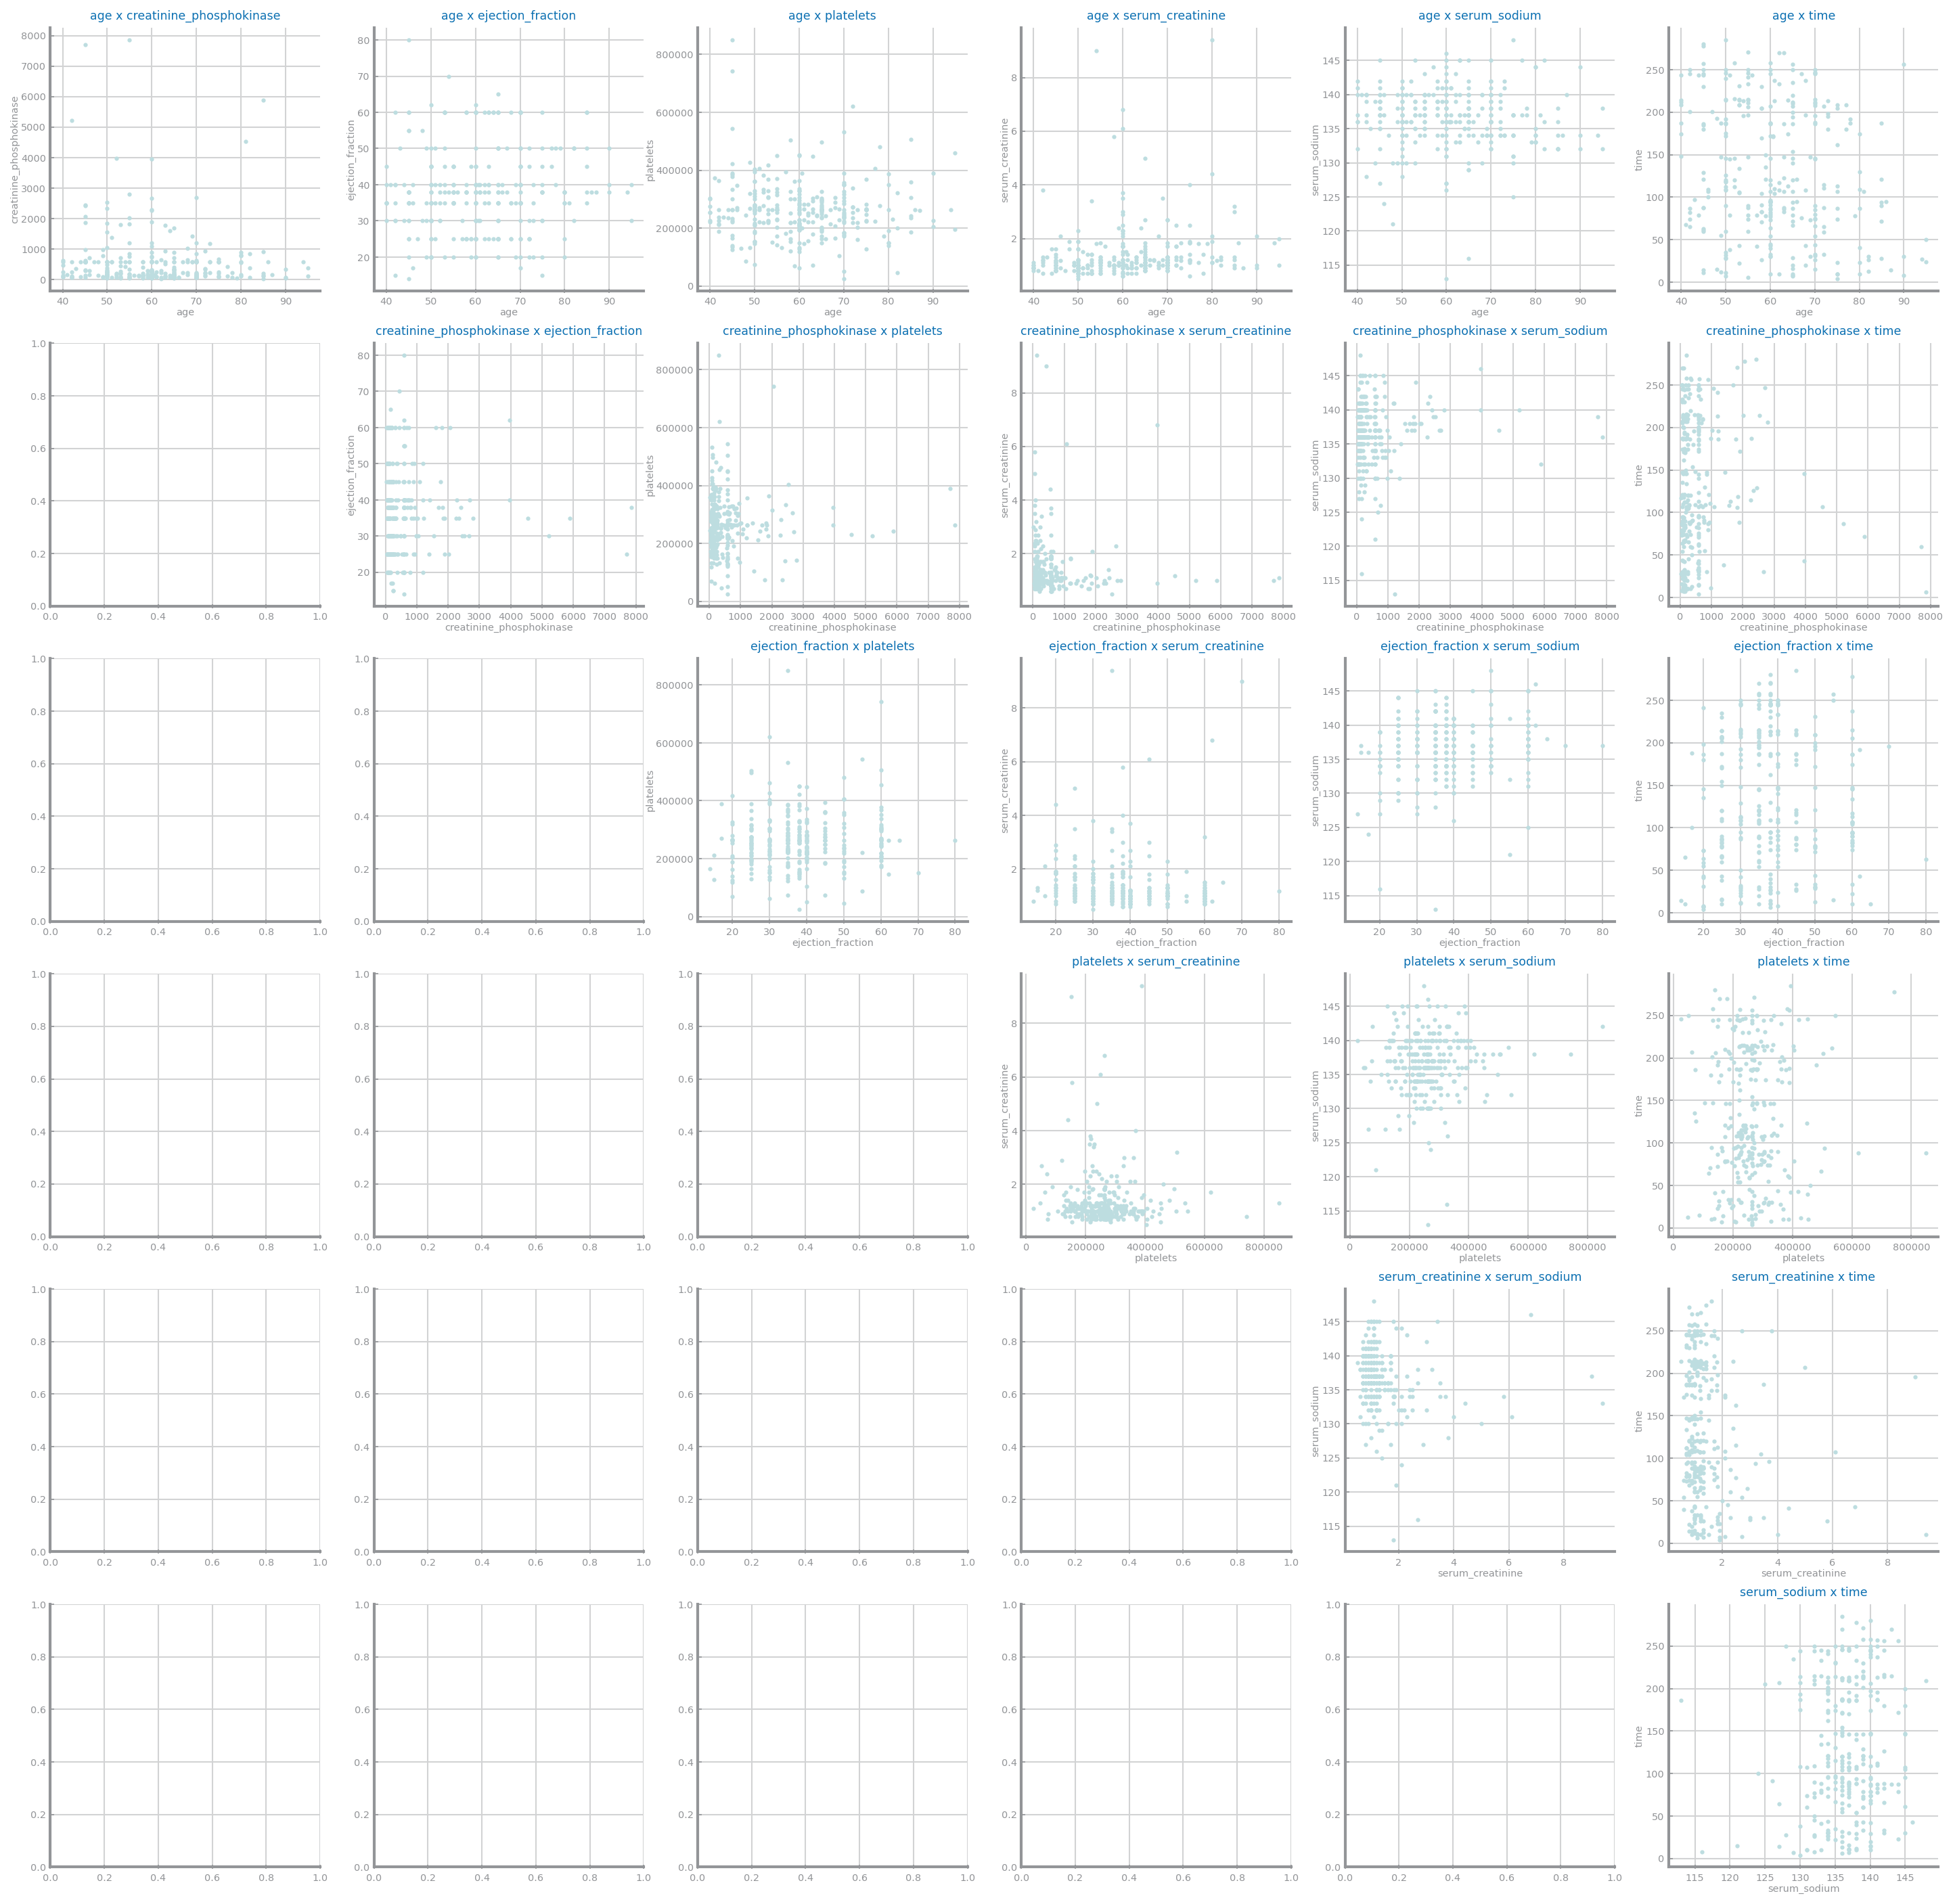

In [2]:
columns = hf_data.select_dtypes(include='number').columns
rows, cols = len(columns)-1, len(columns)-1
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(columns)):
    var1 = columns[i]
    for j in range(i+1, len(columns)):
        var2 = columns[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(hf_data[var1], hf_data[var2])
plt.show()

## Correlation

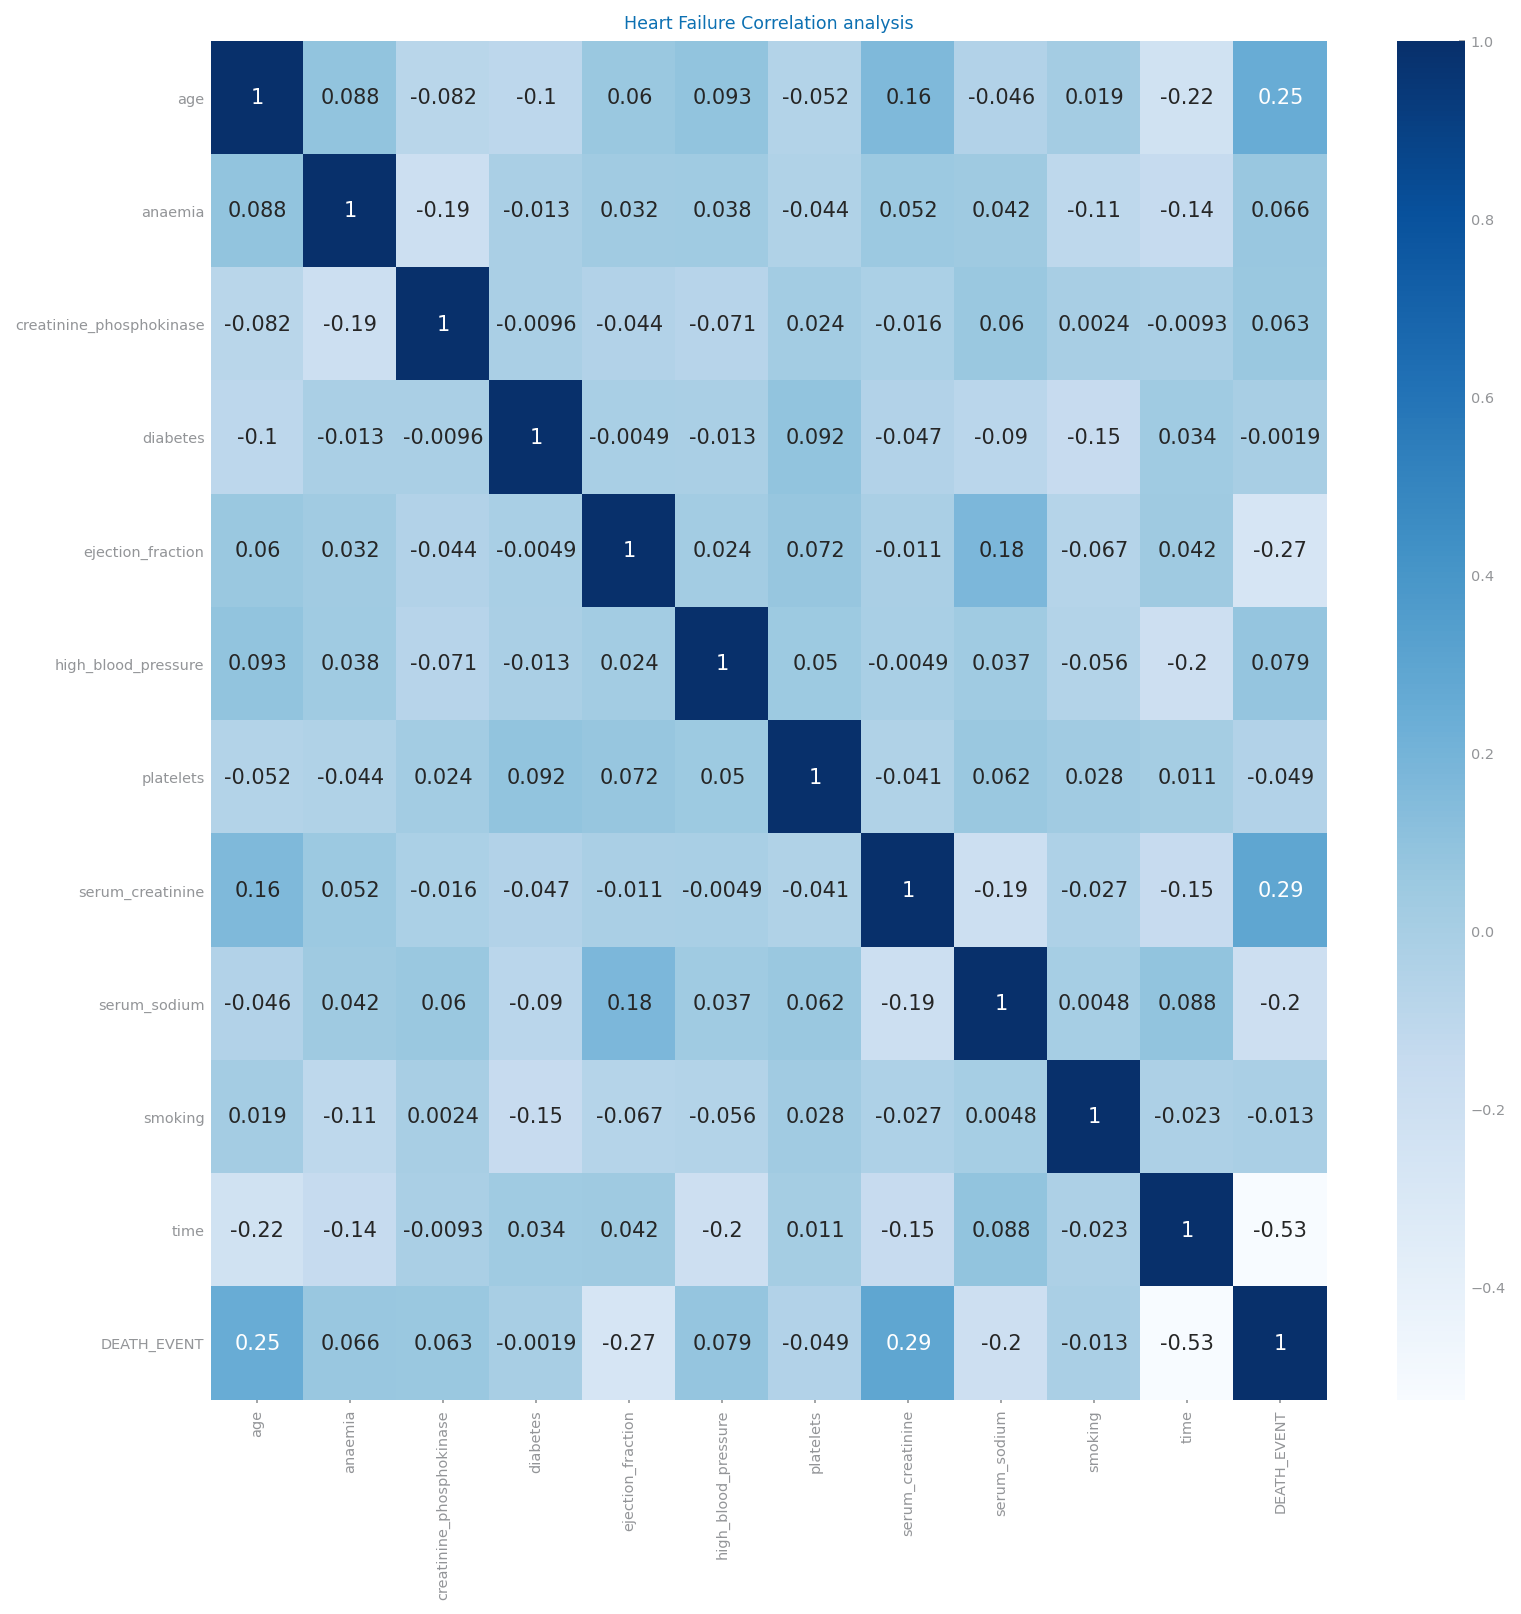

In [3]:
fig = plt.figure(figsize=[12, 12])
corr_mtx = hf_data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Heart Failure Correlation analysis')
plt.show()

# Toxicity Dataset

## Sparsity

All of the variables are binary and so there is no sparsity analysis to be done, since the scatterplot will always just show a square.

## Correlation

In [4]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_abs_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

cp_data = t_data.copy()
cp_data['toxic'].replace({'positive': True, 'negative': False}, inplace=True)
most_cor = get_abs_correlations(cp_data)
most_cor = most_cor[most_cor > 0.95]
print(most_cor)


414  759    0.981486
685  871    0.975301
260  683    0.972504
758  871    0.971219
456  819    0.970810
288  960    0.970227
646  758    0.969676
178  405    0.969388
116  408    0.967029
349  424    0.964966
685  758    0.964156
646  871    0.962571
467  473    0.960607
78   758    0.959788
465  656    0.957170
78   871    0.956573
     646    0.955330
46   53     0.955251
646  685    0.954461
78   685    0.951770
383  657    0.950921
dtype: float64


In [5]:
columns_tox = []
for i in range(len(most_cor.index)):
    columns_tox += [most_cor.index[i][0], most_cor.index[i][1]]
columns_tox = sorted(list(set(columns_tox)))

print(columns_tox)
corr_mtx_toxicity = t_data.corr().loc[columns_tox, columns_tox]
print(corr_mtx_toxicity)

[46, 53, 78, 116, 178, 260, 288, 349, 383, 405, 408, 414, 424, 456, 465, 467, 473, 646, 656, 657, 683, 685, 758, 759, 819, 871, 960]
          46        53        78        116       178       260       288  \
46   1.000000  0.955251 -0.169285  0.074660 -0.007856  0.297848 -0.166374   
53   0.955251  1.000000 -0.182901  0.068559 -0.016648  0.296438 -0.174031   
78  -0.169285 -0.182901  1.000000 -0.019486  0.239553 -0.201698  0.899901   
116  0.074660  0.068559 -0.019486  1.000000  0.134113  0.114044 -0.007513   
178 -0.007856 -0.016648  0.239553  0.134113  1.000000  0.036137  0.230252   
260  0.297848  0.296438 -0.201698  0.114044  0.036137  1.000000 -0.205747   
288 -0.166374 -0.174031  0.899901 -0.007513  0.230252 -0.205747  1.000000   
349  0.570815  0.580756 -0.199340  0.067881  0.036285  0.488751 -0.204203   
383  0.081063  0.074890  0.017493  0.783607  0.135544  0.098167  0.024171   
405 -0.009780 -0.021521  0.252310  0.135657  0.969388  0.030212  0.241753   
408  0.072072  0.065

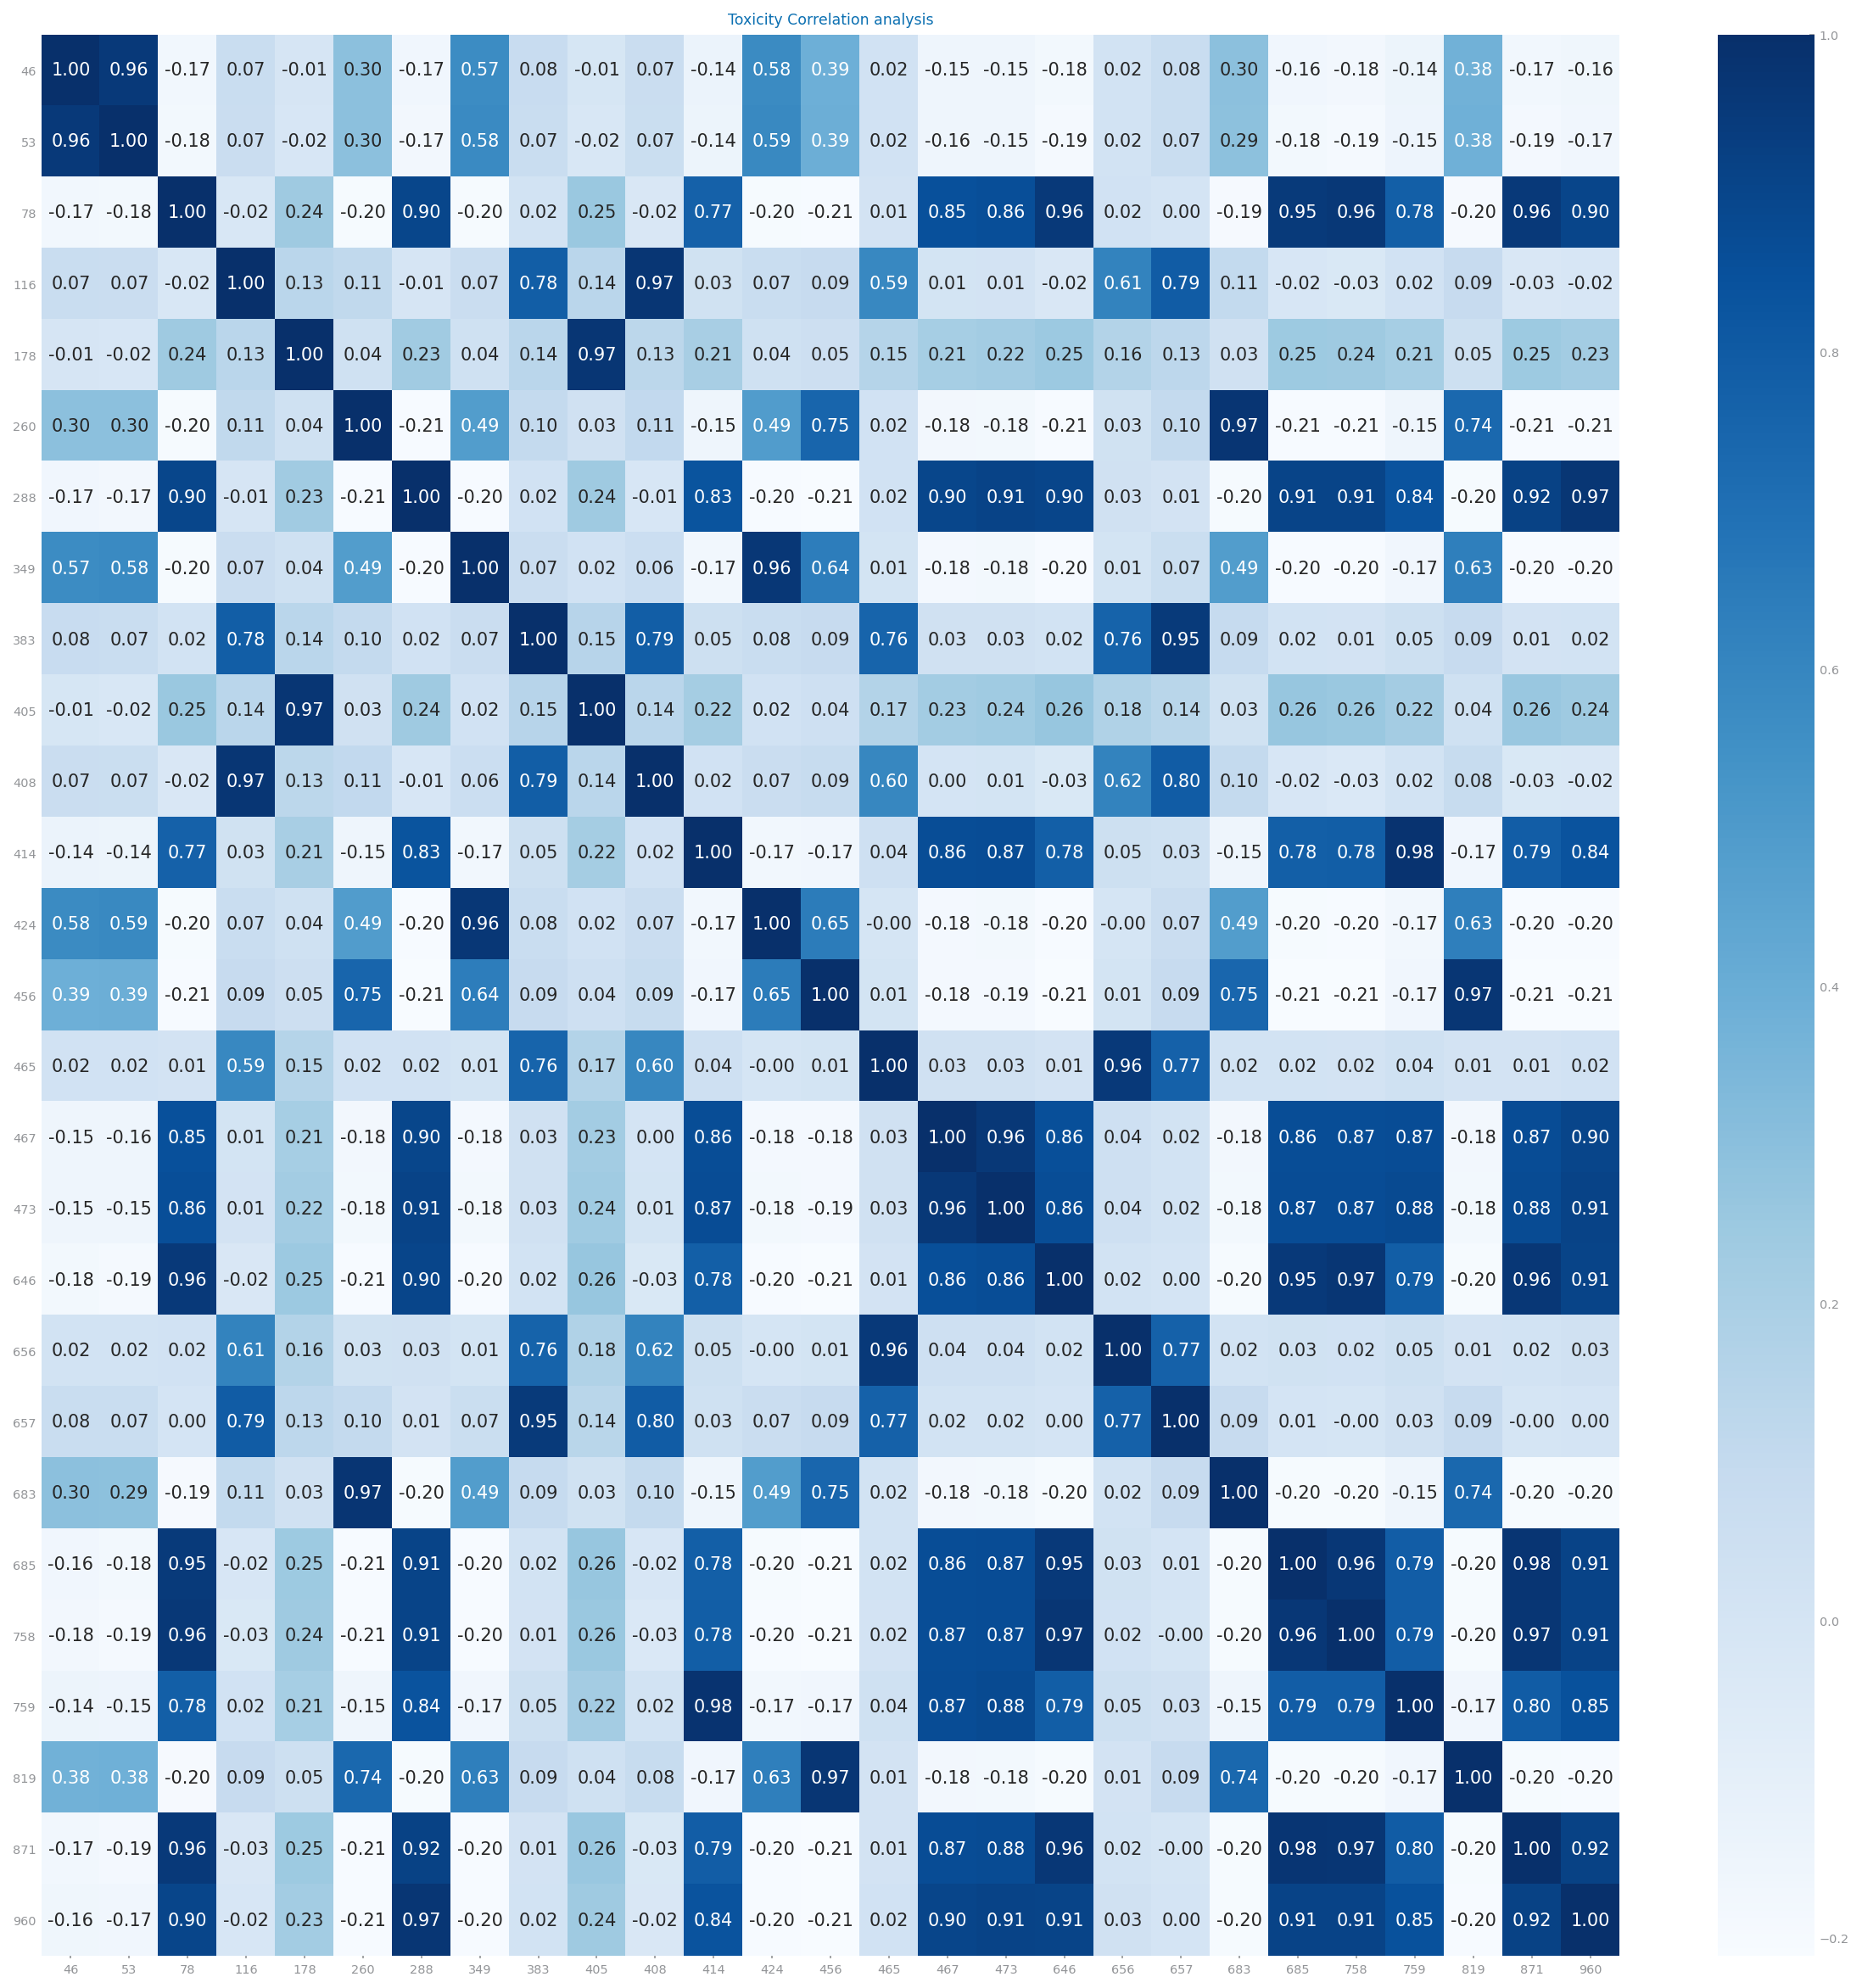

In [6]:
fig = plt.figure(figsize=(20, 20))
sns.heatmap(corr_mtx_toxicity, xticklabels=columns_tox, yticklabels=columns_tox, annot=True, cmap='Blues', fmt='.2f')
plt.yticks(rotation=0)
plt.title('Toxicity Correlation analysis')
plt.show()